# Lower Bound - 2r

(220_HW12_P2r)

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
#Remove
mdl = em.rModel(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1', 0.0, 0.0)
mdl.node('2', 8.0, 0.0)
mdl.node('3', 8.0, 6.0)
mdl.node('4', 16., 6.0)
mdl.node('5', 16., -4.)

# elements
mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.beam('d', n['4'], n['5'])
mdl.truss('e', n['2'], n['4'])

# redundants
mdl.redundant(e['a'], '2')
mdl.redundant(e['c'], '2')
mdl.redundant(e['d'], '3')
mdl.redundant(e['e'], '1')

# Fixities
mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['5'], ['x', 'y', 'rz'])

# Loading
n['3'].p['y'] = -30
n['3'].p['x'] =  50

# Define plastic capacity
e['a'].Qp['+']['2'] = e['a'].Qp['-']['2'] = 120
e['a'].Qp['+']['3'] = e['a'].Qp['-']['3'] = 120
e['c'].Qp['+']['2'] = e['c'].Qp['-']['2'] = 120
e['c'].Qp['+']['3'] = e['c'].Qp['-']['3'] = 120
e['b'].Qp['+']['2'] = e['b'].Qp['-']['2'] = 150
e['b'].Qp['+']['3'] = e['b'].Qp['-']['3'] = 150
e['d'].Qp['+']['2'] = e['d'].Qp['-']['2'] = 180
e['d'].Qp['+']['3'] = e['d'].Qp['-']['3'] = 180
e['e'].Qp['+']['1'] = e['e'].Qp['-']['1'] =  30

mdl.DOF = [[6, 7, 8], [6, 1, 2], [3, 1, 4], [3, 9, 5], [10, 9, 11]]
em.analysis.characterize(mdl)

(0, 4)

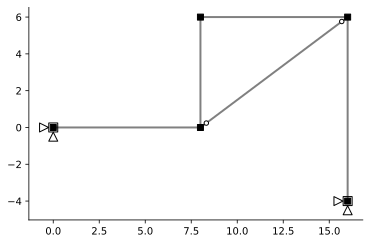

In [3]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [5]:
B = em.B_matrix(mdl)
A = em.A_matrix(mdl)
P = em.P_vector(mdl)
B

,$a_1$,$a_2$,$a_3$,$b_1$,$b_2$,$b_3$,$c_1$,$c_2$,$c_3$,$d_1$,$d_2$,$d_3$,$e_1$
$1$,0.0,-0.125,-0.125,0.0,-0.00000,-0.00000,0.0,0.125,0.125,0.0,0.0,0.0,-0.6
$2$,0.0,0.000,1.000,0.0,1.00000,0.00000,0.0,0.000,0.000,0.0,0.0,0.0,0.0
$3$,0.0,0.000,0.000,0.0,0.16667,0.16667,0.0,0.000,0.000,0.0,0.1,0.1,0.8
$4$,0.0,0.000,0.000,0.0,0.00000,1.00000,0.0,1.000,0.000,0.0,0.0,0.0,0.0
$5$,0.0,0.000,0.000,0.0,0.00000,0.00000,0.0,0.000,1.000,0.0,1.0,0.0,0.0
$6$,0.0,0.000,0.000,0.0,-0.16667,-0.16667,0.0,0.000,0.000,0.0,0.0,0.0,-0.8
$7$,0.0,0.125,0.125,0.0,0.00000,0.00000,0.0,0.000,0.000,0.0,0.0,0.0,0.0
$8$,0.0,1.000,0.000,0.0,0.00000,0.00000,0.0,0.000,0.000,0.0,0.0,0.0,0.0
$9$,0.0,0.000,0.000,0.0,0.00000,0.00000,0.0,-0.125,-0.125,0.0,-0.0,-0.0,0.6
$10$,0.0,0.000,0.000,0.0,0.00000,0.00000,0.0,0.000,0.000,0.0,-0.1,-0.1,0.0


In [6]:
A.f

,$1$,$2$,$3$,$4$,$5$
$a_1$,0.000,0.0,0.00000,0.0,0.0
$a_2$,-0.125,0.0,0.00000,0.0,0.0
$a_3$,-0.125,1.0,0.00000,0.0,0.0
$b_1$,0.000,0.0,0.00000,0.0,0.0
$b_2$,-0.000,1.0,0.16667,0.0,0.0
$b_3$,-0.000,0.0,0.16667,1.0,0.0
$c_1$,0.000,0.0,0.00000,0.0,0.0
$c_2$,0.125,0.0,0.00000,1.0,0.0
$c_3$,0.125,0.0,0.00000,0.0,1.0
$d_1$,0.000,0.0,0.00000,0.0,0.0


In [7]:
Qpr = B.bari@P.f

LinAlgError: Last 2 dimensions of the array must be square

In [8]:
A_mp = A.o@np.array([1, 1/8, -3/4, 1/8, 3/40])
A_mp

C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.matrices.Structural_Vector'> (expected <class 'str'>) for object: Structural_Vector([-1.25000000e-01,  0.00000000e+00,  0.00000000e+00,
                    0.00000000e+00,  2.50000000e-01,  2.00000000e-01,
                   -1.38777878e-17, -7.50000000e-02, -1.20000000e+00])
  FormatterWarning


Structural_Vector([-1.25000000e-01,  0.00000000e+00,  0.00000000e+00,
                    0.00000000e+00,  2.50000000e-01,  2.00000000e-01,
                   -1.38777878e-17, -7.50000000e-02, -1.20000000e+00])

In [9]:
em.analysis.PlasticAnalysis_wLBT(mdl)

(1.7555555555555558,
 iForce_vector([ 120.        ,  -82.66666667,   82.66666667,  120.        ,
                -120.        , -120.        ,  120.        ,  180.        ,
                  30.        ]))

In [ ]:
Qpl = em.Qpl_vector(mdl)
np.abs(A_mp.T)@Qpl[:,0]

In [ ]:
np.abs(np.array([1, 1/8, -3/4, 1/8, 3/40]).T)@np.abs(P.f)

In [ ]:
np.array([1, 1/8, -3/4, 1/8, 3/40]).T@P.f